In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import itertools
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path ='/content/drive/My Drive/shared_FG/MyriamsDatasets.xlsx'
data = pd.read_excel(file_path)

data.head()

,Label,Soma Size,No. of primary dendrites,No. of secondary dendrites,Length of primary dendrites,Length of secondary dendrites,No. of spines per primary dendrites,No. of spines per secondary dendrites
0,Green 114 - 5,82.12,5,8,34.60000,49.28000,5.800000,9.900000
1,Blue 243 - 4,82.99,5,9,30.52000,53.90000,4.100000,10.320000
2,N3_40X_Green490,83.89,9,14,24.30291,60.12327,5.222222,14.928571
3,Orange 108 - 2,85.97,4,9,31.94000,54.62000,5.500000,12.240000
4,Green 114 - 4,86.90,4,9,29.28000,49.33000,5.100000,13.400000


In [4]:
original_label  = data['Label']
data = data.drop('Label', axis=1)

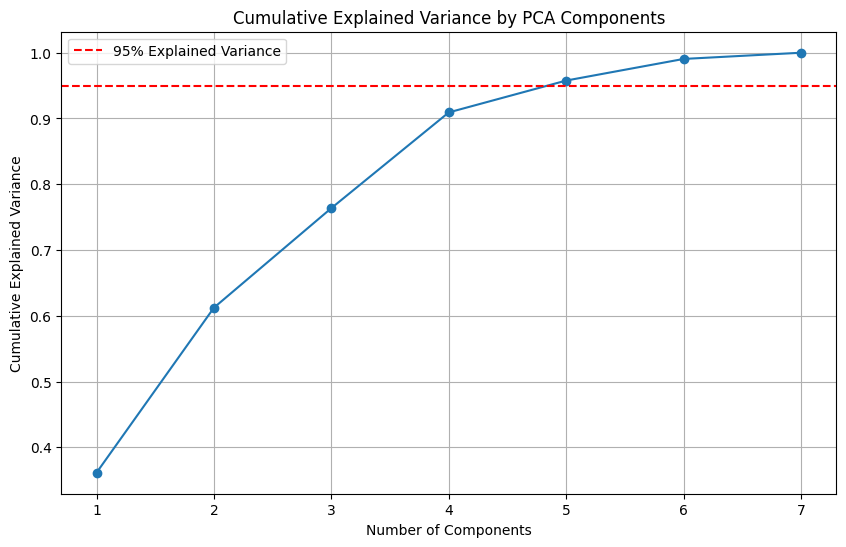

array([0.3614544 , 0.61235073, 0.76372477, 0.90924803, 0.95769517,
       0.99055146, 1.        ])

In [5]:
# calculating the explained variance ratio for PCA with different numbers of components

# Standardizing the data
scaler = StandardScaler()
neurons_standardized = scaler.fit_transform(data)

# applying PCA
pca_full = PCA()
pca_full.fit(neurons_standardized)

# Plotting the cumulative explained variance as a function of the number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

np.cumsum(pca_full.explained_variance_ratio_)


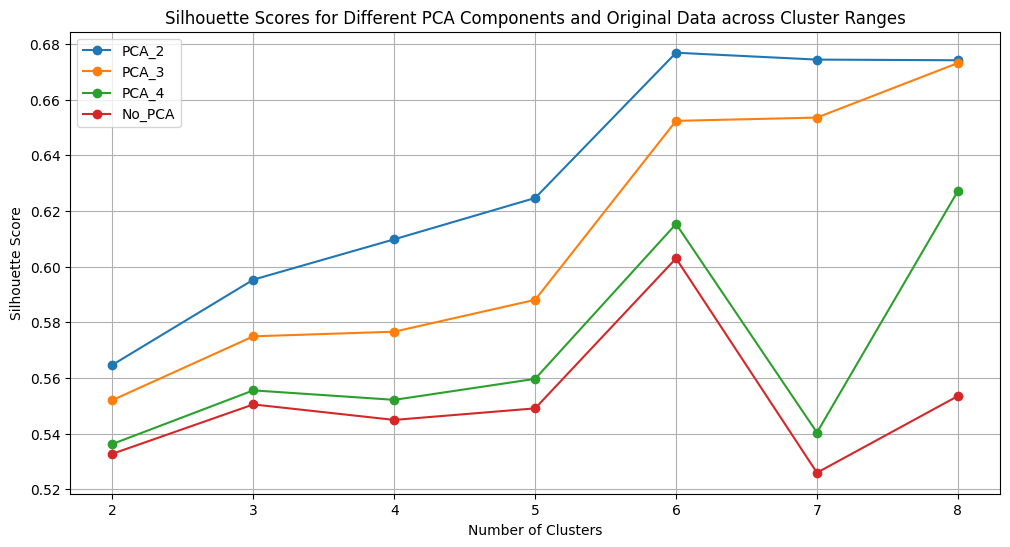

In [6]:
# Redefine the range for the number of clusters
cluster_range = range(2, 9)

# Dictionary to store silhouette scores for each configuration
silhouette_scores_dict = {f'PCA_{n}': [] for n in [2, 3, 4]}
silhouette_scores_dict['No_PCA'] = []

# Apply PCA with different numbers of components and also use the original data where n_components = 'None'
for n_components in [2, 3, 4, None]:
    if n_components is not None:
        pca = PCA(n_components=n_components)
        data_reduced = pca.fit_transform(data)
    else:
        data_reduced = data.values

    # Calculate silhouette scores for different numbers of clusters
    for n_clusters in cluster_range:
        gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        labels = gmm.fit_predict(data_reduced)

        # Calculate and store silhouette score
        score = silhouette_score(data_reduced, labels)
        key = f'PCA_{n_components}' if n_components else 'No_PCA'
        silhouette_scores_dict[key].append(score)

# Plot Silhouette Scores for each PCA configuration and the original data across different cluster numbers
plt.figure(figsize=(12, 6))
for key, scores in silhouette_scores_dict.items():
    plt.plot(cluster_range, scores, marker='o', linestyle='-', label=key)

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different PCA Components and Original Data across Cluster Ranges')
plt.xticks(cluster_range)
plt.legend()
plt.grid(True)
plt.show()

For n_clusters = 2, init_method = kmeans, silhouette score is 0.27747691837173094
For n_clusters = 2, init_method = random, silhouette score is 0.27706361182774564
For n_clusters = 2, init_method = random_from_data, silhouette score is 0.3026008106852021
For n_clusters = 3, init_method = kmeans, silhouette score is 0.3336524181976863
For n_clusters = 3, init_method = random, silhouette score is 0.33273807889296125
For n_clusters = 3, init_method = random_from_data, silhouette score is 0.34930985086823174
For n_clusters = 4, init_method = kmeans, silhouette score is 0.3941308910900372
For n_clusters = 4, init_method = random, silhouette score is 0.3139622636971583
For n_clusters = 4, init_method = random_from_data, silhouette score is 0.33322424672423123
For n_clusters = 5, init_method = kmeans, silhouette score is 0.48490496723250803
For n_clusters = 5, init_method = random, silhouette score is 0.2888208654258348
For n_clusters = 5, init_method = random_from_data, silhouette score is 0

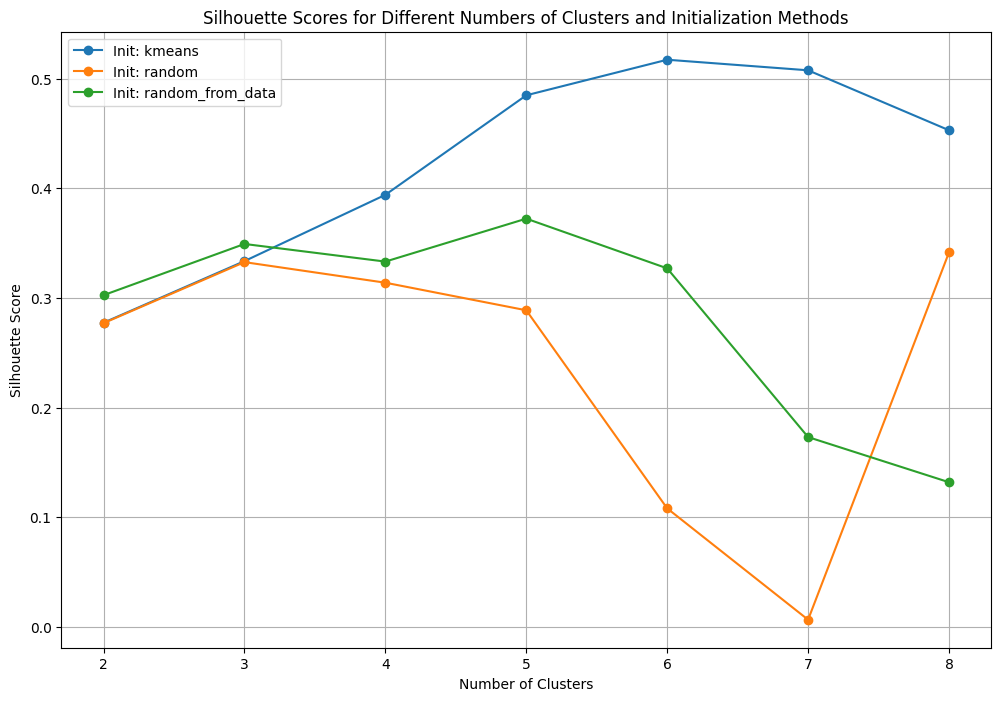

GaussianMixture(n_components=6, random_state=42)

In [7]:
# Tuning the number of clusters and initialization method only

# scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=4)
data_pca = pca.fit_transform(data_scaled)

# Function to calculate silhouette score
def get_silhouette(data, n_clusters, init_param):
    gmm = GaussianMixture(n_components=n_clusters, init_params=init_param, random_state=42)
    labels = gmm.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    return silhouette_avg

# Parameters to tune
range_n_clusters = list(range(2, 9))
init_methods = ['kmeans', 'random', 'random_from_data']

results_list = []

# Perform grid search
for n_clusters in range_n_clusters:
    for init_method in init_methods:
        score = get_silhouette(data_pca, n_clusters, init_method)
        results_list.append({
            'n_clusters': n_clusters,
            'init_method': init_method,
            'silhouette_score': score })
        print(f"For n_clusters = {n_clusters}, init_method = {init_method}, silhouette score is {score}")

results_df = pd.DataFrame(results_list)

# Find the best model based on silhouette score
best_model = results_df.loc[results_df['silhouette_score'].idxmax()]

print("\nBest model configuration:")
print(best_model)

# Plot silhouette scores by init_method
plt.figure(figsize=(12, 8))
for method in init_methods:
    subset = results_df[results_df['init_method'] == method]
    plt.plot(subset['n_clusters'], subset['silhouette_score'], marker='o', label=f'Init: {method}')

plt.title('Silhouette Scores for Different Numbers of Clusters and Initialization Methods')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()

# Fit GMM with the optimal parameters
best_gmm = GaussianMixture(n_components=int(best_model['n_clusters']),
                           init_params=best_model['init_method'],
                           random_state=42)
best_gmm.fit(data_pca)

In [8]:
# Tuning several GMM parameters

X = data.values

# Apply PCA to reduce dimensions
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X)

# Define parameters for tuning
n_components = [5, 6, 7]
covariance_types = ['spherical', 'diag', 'tied', 'full']
max_iter_grid = [10, 15, 20, 50, 100, 150]
tol_grid = [1e-1, 1e-2, 1e-3, 1e-4]
init_params = ['kmeans', 'random', 'random_from_data']

results_list = []

# Perform grid search
for n in n_components:
    for covariance_type in covariance_types:
        for max_iter in max_iter_grid:
            for tol in tol_grid:
                for init in init_params:
                    gmm = GaussianMixture(n_components=n, covariance_type=covariance_type,
                                          max_iter=max_iter, tol=tol, init_params=init, random_state=42)
                    gmm.fit(X_pca)
                    labels = gmm.predict(X_pca)

                    # Compute metrics
                    silhouette = silhouette_score(X_pca, labels)
                    aic = gmm.aic(X_pca)
                    bic = gmm.bic(X_pca)

                    # Record metrics
                    results_list.append({
                        'n_components': n,
                        'covariance_type': covariance_type,
                        'max_iter': max_iter,
                        'tol': tol,
                        'init_params': init,
                        'silhouette_score': silhouette,
                        'aic': aic,
                        'bic': bic
                    })

# Convert list of results to DataFrame
results_df = pd.DataFrame(results_list)

# Find the best models based on different criteria
best_silhouette = results_df.loc[results_df['silhouette_score'].idxmax()]
best_aic = results_df.loc[results_df['aic'].idxmin()]
best_bic = results_df.loc[results_df['bic'].idxmin()]

print("Best model by Silhouette Score:")
print(best_silhouette)
print("\nBest model by AIC:")
print(best_aic)
print("\nBest model by BIC:")
print(best_bic)


Best model by Silhouette Score:
n_components                  6
covariance_type       spherical
max_iter                     10
tol                         0.1
init_params              kmeans
silhouette_score        0.61531
aic                 1058.103645
bic                 1113.526808
Name: 288, dtype: object

Best model by AIC:
n_components                       7
covariance_type                 full
max_iter                          10
tol                              0.1
init_params         random_from_data
silhouette_score            0.154597
aic                       663.941357
bic                       828.627327
Name: 794, dtype: object

Best model by BIC:
n_components                       7
covariance_type                 full
max_iter                          10
tol                              0.1
init_params         random_from_data
silhouette_score            0.154597
aic                       663.941357
bic                       828.627327
Name: 794, dtype: object


In [ ]:

# Fit a GMM to the PCA-reduced data using the optimal parameters (chosen according to AIC, BIC and Silhouette Score)

gmm_params = {
    'n_components': 6,
    'covariance_type': 'spherical',
    'max_iter': 10,
    'tol': 0.1,
    'random_state': 42
}

gmm = GaussianMixture(**gmm_params)
gmm.fit(X_pca)

# Predict the cluster for each data point
labels = gmm.predict(X_pca)

labels

array([4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 5, 5, 0, 0, 0, 5, 3, 3, 3, 3, 3])

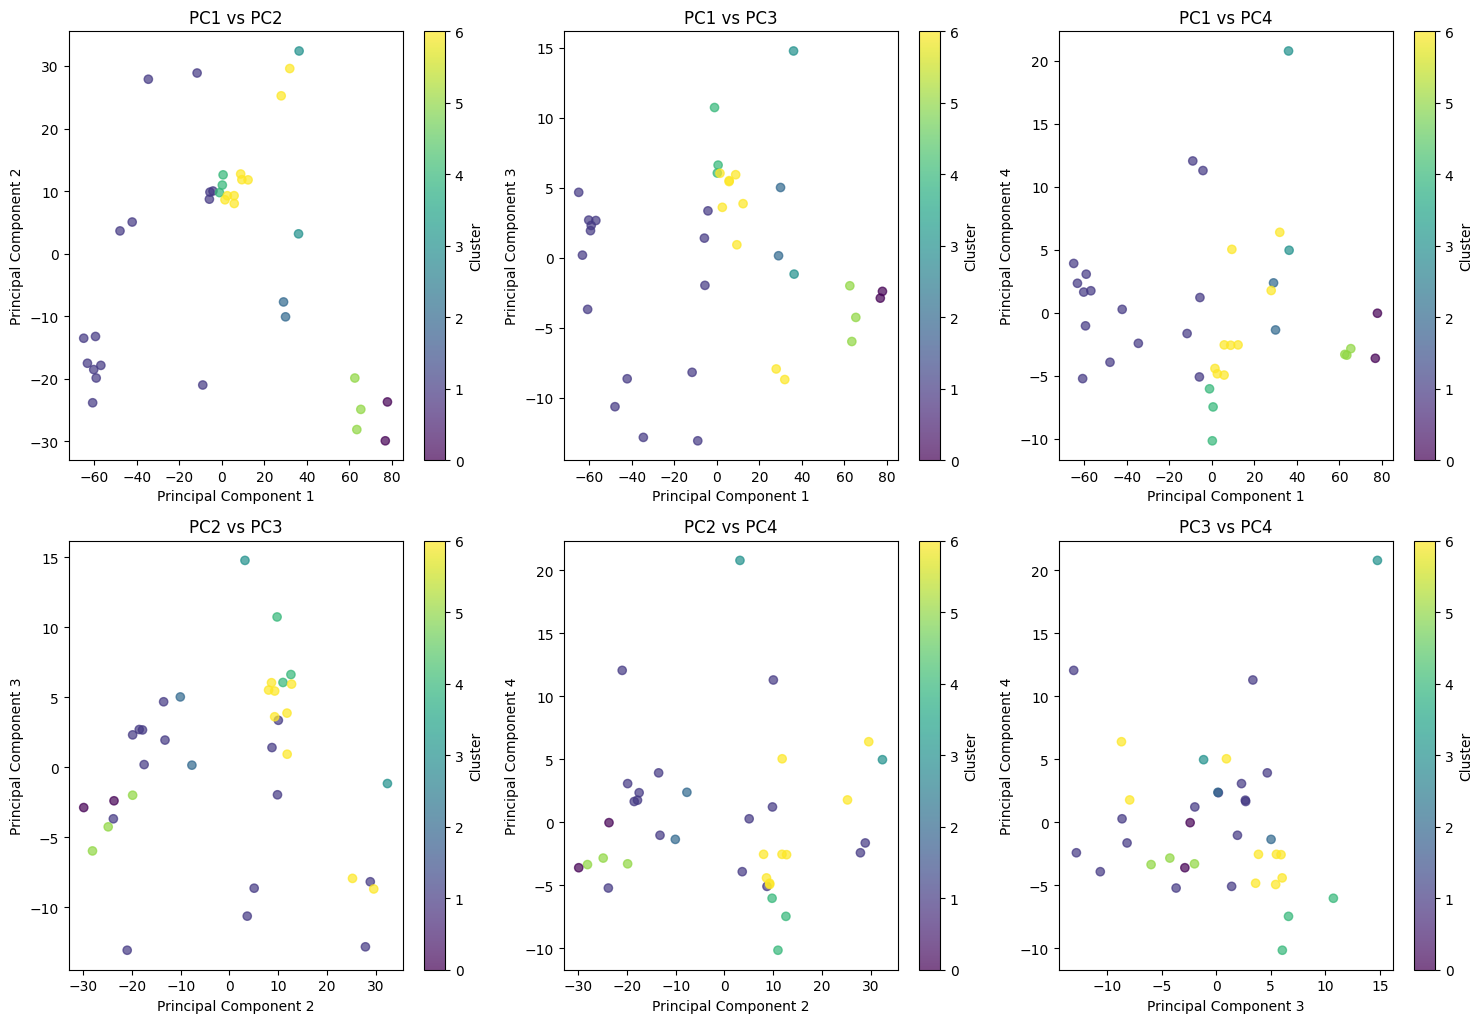

In [10]:
# Visualize clusters with PCA for all pairs of principal components

# Generate all pairs of principal components
pairs = list(itertools.combinations(range(X_pca.shape[1]), 2))

plt.figure(figsize=(15, 15))
for i, (pc1, pc2) in enumerate(pairs, 1):
    plt.subplot(3, 3, i)
    plt.scatter(X_pca[:, pc1], X_pca[:, pc2], c=labels, cmap='viridis', alpha=0.7)
    plt.title(f'PC{pc1 + 1} vs PC{pc2 + 1}')
    plt.xlabel(f'Principal Component {pc1 + 1}')
    plt.ylabel(f'Principal Component {pc2 + 1}')
    plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

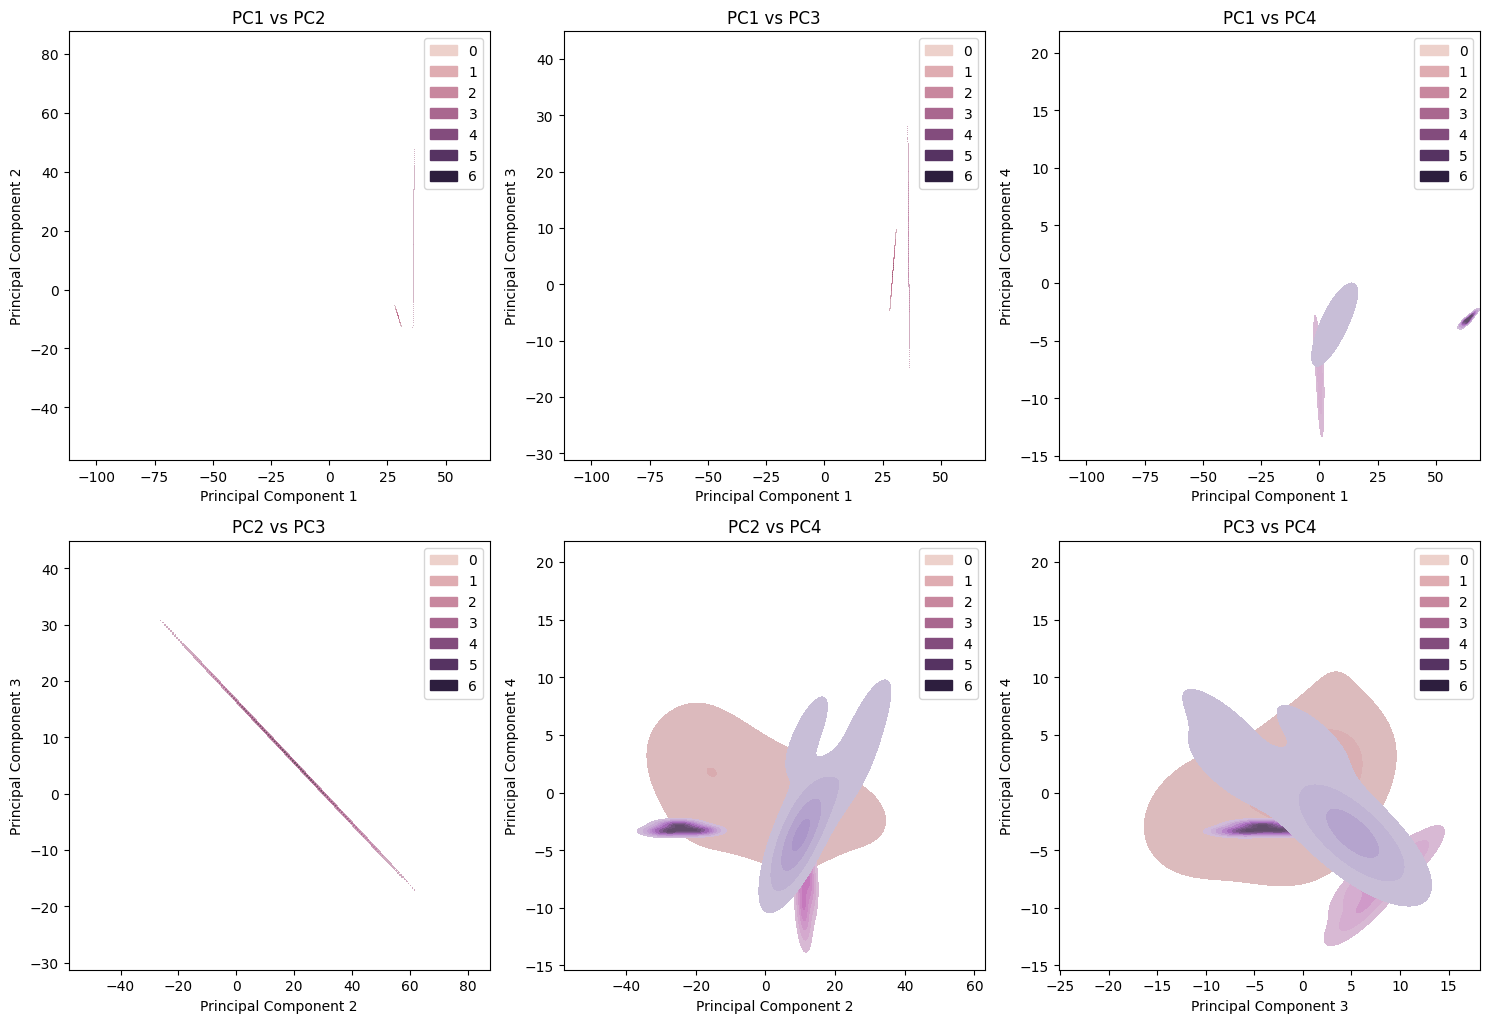

In [11]:
# Visualize cluster densities with PCA for all pairs of principal components
pairs = list(itertools.combinations(range(X_pca.shape[1]), 2))

plt.figure(figsize=(15, 15))
for i, (pc1, pc2) in enumerate(pairs, 1):
    plt.subplot(3, 3, i)
    sns.kdeplot(x=X_pca[:, pc1], y=X_pca[:, pc2], hue=labels, fill=True)
    plt.title(f'PC{pc1 + 1} vs PC{pc2 + 1}')
    plt.xlabel(f'Principal Component {pc1 + 1}')
    plt.ylabel(f'Principal Component {pc2 + 1}')
plt.tight_layout()
plt.show()


In [ ]:
# Display predicted Cluster Labels along with their respective probablities

# Get the cluster labels for each point
cluster_labels = labels

# Get the probabilities of each point belonging to each cluster
probabilities = gmm.predict_proba(X_pca)

# Calculate the probability of each point belonging to its assigned cluster
max_probabilities = probabilities.max(axis=1)

# Create a DataFrame with the original labels, cluster labels, and probabilities
result_df = pd.DataFrame({
    'Original_Labels': original_label,
    'Cluster_Labels': cluster_labels,
    'Cluster_Probability': max_probabilities
})


In [ ]:
result_df

,Original_Labels,Cluster_Labels,Cluster_Probability
0,Green 114 - 5,4,1.000000
1,Blue 243 - 4,4,1.000000
2,N3_40X_Green490,4,1.000000
3,Orange 108 - 2,4,1.000000
4,Green 114 - 4,4,1.000000
5,Green 114 - 1,4,1.000000
6,Yellow 505 - 5,4,1.000000
7,N4_40X_Lilac281,1,1.000000
8,N2_40X_Green490,1,1.000000
9,N4_40X_Blue235,1,0.999996
